#Importar librerias y captura de datos de la web

In [25]:
import numpy as np
import pandas as pd
import requests

from io import StringIO

#captura de datos de la web
orig_url='https://drive.google.com/file/d/1iYmo2Tw3ZHaOiSq2SdnSOnMXZTKwTJ9N/view?usp=sharing'#Url original

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id #Direccion para capturar los datos segun ID
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

#Ordenar el df dejando solo los datos que se relacionen a PM10 (particulas en suspension)
#extraer los datos mas importantes fecha y concentracion (pm10)

In [26]:
df.drop(['Autoridad Ambiental', 'Nombre de la estaciÃ³n',
       'TecnologÃ­a', 'Latitud', 'Longitud', 'CÃ³digo del departamento',
       'Departamento', 'CÃ³digo del municipio', 'Nombre del municipio',
       'Tipo de estaciÃ³n', 'Tiempo de exposiciÃ³n', 
       'Nueva columna georreferenciada'], axis=1, inplace=True)

#df despues del drop
df.columns = ['fecha','variable','unidades','concentracion']

In [27]:
df.columns

Index(['fecha', 'variable', 'unidades', 'concentracion'], dtype='object')

In [28]:
df.shape

(120, 4)

In [29]:
dfFinal = df.drop(df[df['variable']!='PM10'].index)

In [30]:
dfFinal.drop(['variable','unidades'], axis=1, inplace=True)

In [31]:
dfFinal
dfFinal.shape

(20, 2)

Finaliza la captura de datos y empieza la creacion de la visualizacion

##Mostrar las concentraciones por variable PM10 en Segovia Antioquia

Para el trabajo de visualización enfoncado a los concepto de Tamara, se pretende realizar la abastracción de la tarea de la siguiente forma:
Analisis del What de una Visualizacion segun Tamara Munzner
En cuanto a la acción se pretende Analizar para Descubrir casos donde los datos son atípicos

Analisis del What de una Visualizacion segun Tamara Munzner
What? (Saber identificar el tipo de datos) Visualización es una representación visual o gráfica, externa (percepción), basada en computador con el objetivo de facilitar la tarea al usuario, lo más importante son datos, la tarea y los usuarios.

What (DataSets)
Visualizacion
What (Attributes)
Visualizacion

<img src=https://raw.githubusercontent.com/darbela4/ImagenesTamara/master/what1.jpg>


<img src=https://raw.githubusercontent.com/darbela4/ImagenesTamara/master/what2.jpg>

Analisis del Why de una Visualizacion segun Tamara Munzner
Es la abstraction de la tarea, está compuesto de dos partes la acción y el objetivo

Why (Actions)
Visualizacion
Why (Targets)
Visualizacion


<img src=https://raw.githubusercontent.com/darbela4/ImagenesTamara/master/why1.jpg>

<img src=https://raw.githubusercontent.com/darbela4/ImagenesTamara/master/why2.jpg>

Analisis del How de una Visualizacion segun Tamara Munzner
Es la forma en cómo se va a realizar ese análisis visual

How
Visualizacion

<img src=https://raw.githubusercontent.com/darbela4/ImagenesTamara/master/how1.jpg>

    index                      fecha  concentracion
0       0  01/10/2014 12:00:00 a. m.           82.4
1       1  02/10/2014 12:00:00 a. m.           82.3
2       2  03/10/2014 12:00:00 a. m.          106.3
3      83  14/09/2014 12:00:00 a. m.           41.7
4      84  15/09/2014 12:00:00 a. m.           54.6
5      85  16/09/2014 12:00:00 a. m.           57.4
6      86  17/09/2014 12:00:00 a. m.           49.2
7      87  18/09/2014 12:00:00 a. m.           32.3
8      88  19/09/2014 12:00:00 a. m.           43.2
9      89  20/09/2014 12:00:00 a. m.           60.9
10     90  21/09/2014 12:00:00 a. m.           33.2
11     91  22/09/2014 12:00:00 a. m.           26.0
12     92  23/09/2014 12:00:00 a. m.           41.9
13     93  24/09/2014 12:00:00 a. m.           77.4
14     94  25/09/2014 12:00:00 a. m.           57.6
15     95  26/09/2014 12:00:00 a. m.           54.1
16     96  27/09/2014 12:00:00 a. m.           60.5
17     97  28/09/2014 12:00:00 a. m.           49.9
18     98  2

Text(0, 0.5, 'Concentración de PM10 en µg/m3')

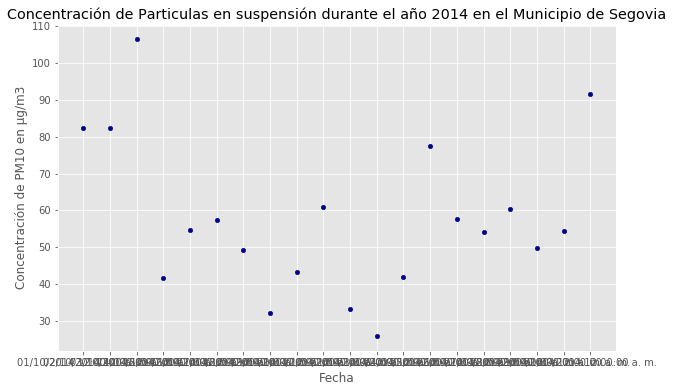

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
mpl.style.use('ggplot')#estilos de la representacion

#ordenamos el index
dfFinal.reset_index(inplace = True)
print(dfFinal)

#visualizacion de datos
dfFinal.plot(kind='scatter', x='fecha', y='concentracion', figsize=(10, 6), color='darkblue' )

plt.title('Concentración de Particulas en suspensión durante el año 2014 en el Municipio de Segovia')
plt.xlabel('Fecha')
plt.ylabel('Concentración de PM10 en µg/m3')